# Load Models & Modules

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
!kaggle datasets download -d aladdinpersson/pascal-voc-dataset-used-in-yolov3-video

100%|█████████████████████████████████████▉| 4.31G/4.31G [01:10<00:00, 47.2MB/s]
100%|██████████████████████████████████████| 4.31G/4.31G [01:10<00:00, 66.0MB/s]


In [5]:
!unzip -qq pascal-voc-dataset-used-in-yolov3-video.zip
!rm -rf pascal-voc-dataset-used-in-yolov3-video.zip

# Loading train and test data with transforms and loader functions

In [3]:
import warnings
import config
warnings.filterwarnings("ignore")

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | YOLOv3 | 61.6 M
---------------------------------
61.6 M    Trainable params
0         Non-trainable params
61.6 M    Total params
246.506   Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=40` reached.


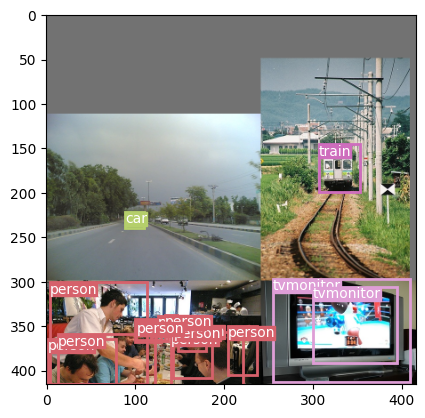

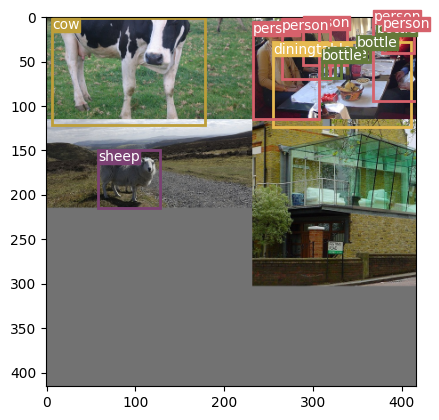

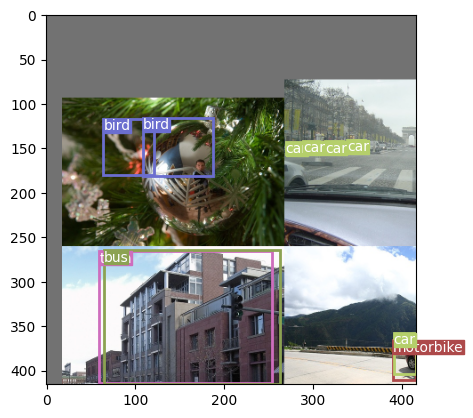

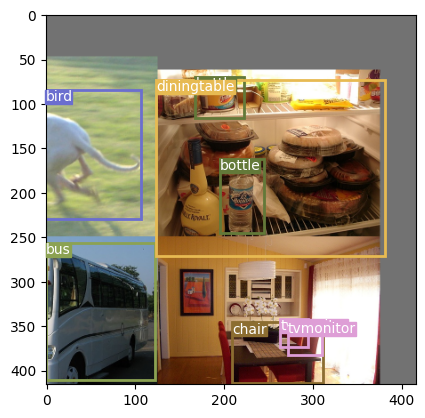

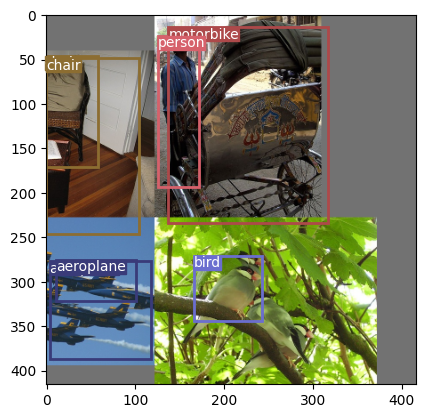

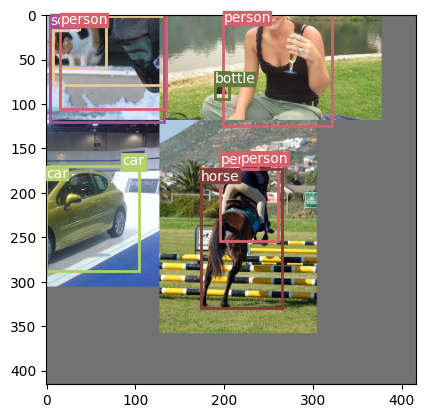

Class accuracy is: 87.600876%
No obj accuracy is: 98.140427%
Obj accuracy is: 80.607513%


 12%|█▏        | 25/207 [02:09<13:53,  4.58s/it]

In [ ]:
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
import torch

from torch.optim.lr_scheduler import OneCycleLR
from torch.optim.swa_utils import AveragedModel, update_bn
from train import LitYOLOv3

model = LitYOLOv3()

trainer = Trainer(
    max_epochs=config.NUM_EPOCHS * 2 // 5,
    precision="16-mixed",
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    logger=CSVLogger(save_dir="logs/"),
    callbacks=[LearningRateMonitor(logging_interval="step"), TQDMProgressBar(refresh_rate=10)],
)

trainer.fit(model)

In [5]:
torch.save(model.model.state_dict(), "custom_yolo_v3.pt")